In [1]:
# Import packages for data understanding and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
np.random.seed(42)

### Get the data

In [2]:
data = pd.read_csv('../data/raw/marketing_data.csv')
data.shape

(2240, 28)

The full dataset contains 2240 samples. Each sample contains 28 features. The data is acquired from [Kaggle](https://www.kaggle.com/jackdaoud/marketing-data)

### Short inspection of the data

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

We have some issues in **Income** feature. Apart from containing null values, it is also recorded as an *object (char)* type which we don't want. So, we need to transform it into float data type

In [5]:
data.rename(columns={' Income ': 'Income'}, inplace=True)
data['Income'] = data['Income'].str.replace('[$,]', '').astype(float)
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [6]:
data.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
955,6958,1977,Master,Married,27889.0,1,0,7/5/13,42,14,...,2,6,0,0,0,0,0,0,0,AUS
219,10909,1948,Graduation,Married,92344.0,0,0,1/15/14,9,992,...,5,1,1,0,1,0,0,0,0,AUS
1088,454,1980,Graduation,Together,69508.0,1,0,11/14/12,48,824,...,11,6,0,0,0,0,0,0,0,SA
417,11086,1984,Basic,Single,25707.0,1,0,1/18/14,18,1,...,3,7,0,0,0,0,0,0,0,SP
1647,10770,1959,Graduation,Married,65492.0,0,0,1/26/14,73,247,...,13,2,0,0,0,0,0,0,0,CA


In [7]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.150271,0.009477
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.357417,0.096907
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There are some odd numbers on the table above. We should check them further

### Inspecting customers' profile

We will drop **ID** feature since it doesn't give valuable information to us

In [8]:
data = data.drop('ID', axis=1)

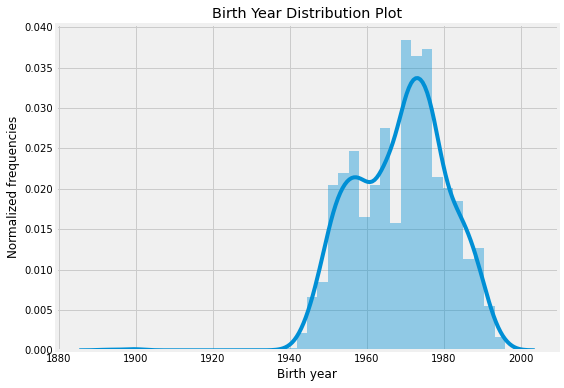

In [9]:
# Inspecting birth year
fig = plt.subplots(figsize=(8, 6))
sns.distplot(data['Year_Birth'])
plt.ylabel('Normalized frequencies')
plt.xlabel('Birth year')
plt.title('Birth Year Distribution Plot')
plt.show()

Most of our customers were born after 1940. We also can see that some of them were born around 1900. Meanwhile, [the oldest person in the world](https://www.guinnessworldrecords.com/news/2020/10/the-worlds-oldest-people-and-their-secrets-to-a-long-life-632895#:~:text=Kane%20Tanaka%20(Japan%2C%20b.,verified%20on%2012%20February%202020).) was born in 1903. So, I think it is reasonable to drop data points that has birth year less than 1900

In [10]:
data[data['Year_Birth'] < 1900]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
513,1893,2n Cycle,Single,60182.0,0,1,5/17/14,23,8,0,...,2,4,0,0,0,0,0,0,0,SA
827,1899,PhD,Together,83532.0,0,0,9/26/13,36,755,144,...,4,1,0,0,1,0,0,0,0,SP


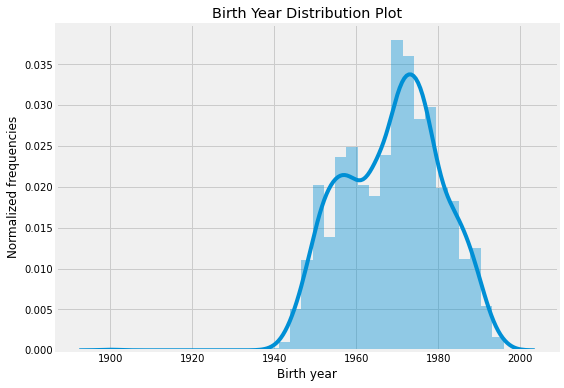

In [11]:
data = data[data['Year_Birth'] >= 1900]

fig = plt.subplots(figsize=(8, 6))
sns.distplot(data['Year_Birth'])
plt.ylabel('Normalized frequencies')
plt.xlabel('Birth year')
plt.title('Birth Year Distribution Plot')
plt.show()

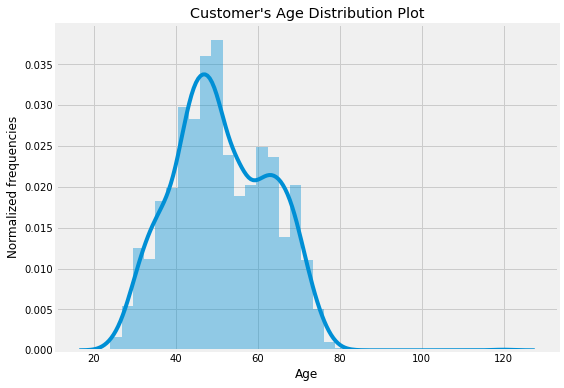

In [44]:
# Inspecting customer's age
data['Age'] = pd.to_datetime('2020-12-19').year - data['Year_Birth']

fig = plt.subplots(figsize=(8, 6))
sns.distplot(data['Age'])
plt.ylabel('Normalized frequencies')
plt.xlabel('Age')
plt.title("Customer's Age Distribution Plot")
plt.show()

In [45]:
data['Age'].describe()

count    2214.000000
mean       51.113821
std        11.788912
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max       120.000000
Name: Age, dtype: float64

Since we have **Age** information, we no longer need birth year feature

In [47]:
data = data.drop('Year_Birth', axis=1)

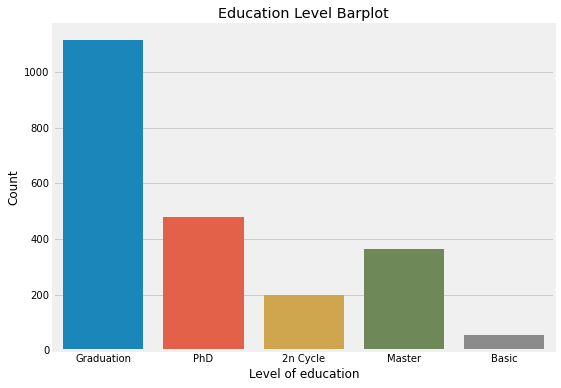

In [12]:
# Inspecting education level
fig = plt.subplots(figsize=(8, 6))
sns.countplot(data['Education'])
plt.ylabel('Count')
plt.xlabel('Level of education')
plt.title('Education Level Barplot')
plt.show()

Based on [this explanation](https://www.unipi.it/index.php/study/item/2265-educational-system?tmpl=component&print=1) that said **2n Cycle** level of education is just the same as Master's degree, we will combine **2n Cycle** and **Master** as well as rename **Graduation** into **Bachelor**  

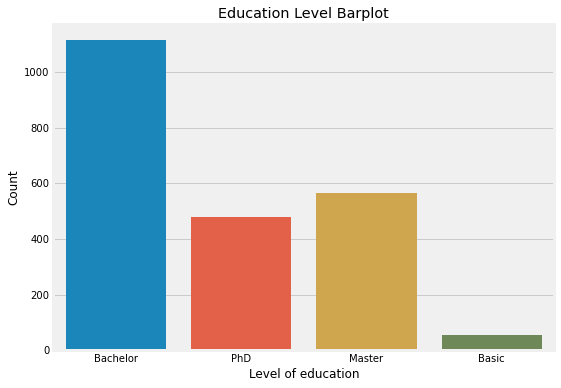

In [13]:
data['Education'].replace({'Graduation': 'Bachelor', '2n Cycle': 'Master'}, inplace=True)

fig = plt.subplots(figsize=(8, 6))
sns.countplot(data['Education'])
plt.ylabel('Count')
plt.xlabel('Level of education')
plt.title('Education Level Barplot')
plt.show()

In [14]:
print('Percentage of each education level:')

for i in data['Education'].unique():
    print(i + ': ' + str(len(data[data['Education'] == i]) / len(data) * 100))

Percentage of each education level:
Bachelor: 50.40650406504065
PhD: 21.680216802168022
Master: 25.474254742547426
Basic: 2.4390243902439024


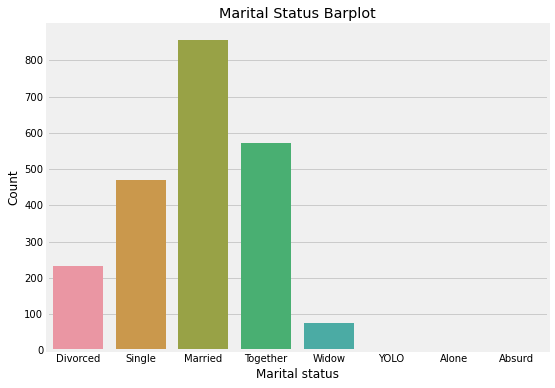

In [15]:
# Inspecting marital status
fig = plt.subplots(figsize=(8, 6))
sns.countplot(data['Marital_Status'])
plt.ylabel('Count')
plt.xlabel('Marital status')
plt.title('Marital Status Barplot')
plt.show()

There are 3 categories 'YOLO', 'Alone', 'Absurd' which are not valid marital statuses, with very low number of customers in each. We will just combine them into 'Single' category

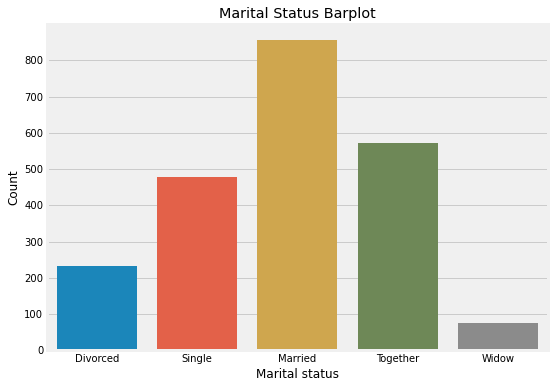

In [16]:
data['Marital_Status'] = data['Marital_Status'].replace(['YOLO', 'Alone', 'Absurd'], 'Single')

fig = plt.subplots(figsize=(8, 6))
sns.countplot(data['Marital_Status'])
plt.ylabel('Count')
plt.xlabel('Marital status')
plt.title('Marital Status Barplot')
plt.show()

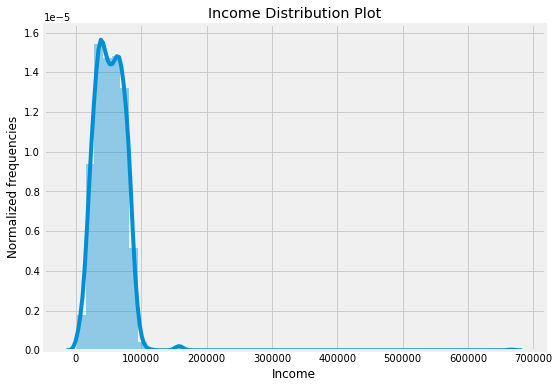

In [17]:
# Inspecting distribution plot
fig = plt.subplots(figsize=(8, 6))
sns.distplot(data['Income'])
plt.ylabel('Normalized frequencies')
plt.xlabel('Income')
plt.title('Income Distribution Plot')
plt.show()

In [18]:
data['Income'].describe()

count      2214.000000
mean      52229.537037
std       25175.095832
min        1730.000000
25%       35265.000000
50%       51371.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

In [19]:
data[data['Income'] > 600000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,1977,Bachelor,Together,666666.0,1,0,6/2/13,23,9,14,...,3,6,0,0,0,0,0,0,0,SA


There are some significant outliers on the upper bound, with one outlier > 600,000. We will change the value of this data point with the median value of **Income**

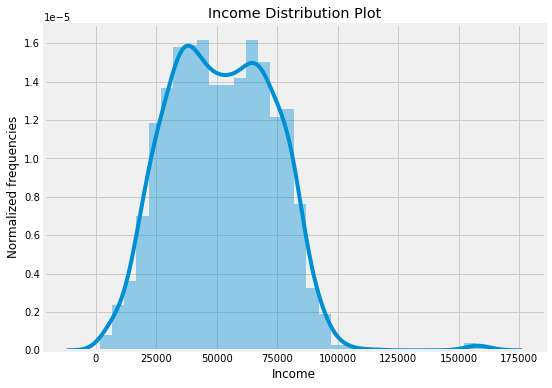

In [20]:
data.loc[data['Income'] > 600000, 'Income'] = data['Income'].median()

fig = plt.subplots(figsize=(8, 6))
sns.distplot(data['Income'])
plt.ylabel('Normalized frequencies')
plt.xlabel('Income')
plt.title('Income Distribution Plot')
plt.show()

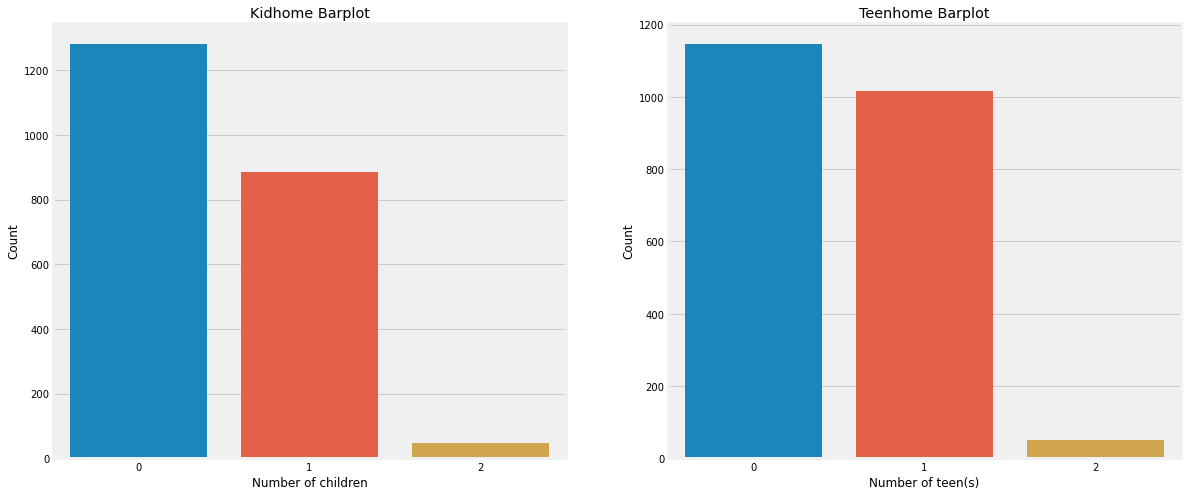

In [21]:
# Inspecting 'Kidhome' and 'Teenhome'
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
ax = ax.ravel()

sns.countplot(data['Kidhome'], ax=ax[0])
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Number of children')
ax[0].set_title('Kidhome Barplot')

sns.countplot(data['Teenhome'], ax=ax[1])
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Number of teen(s)')
ax[1].set_title('Teenhome Barplot')

plt.show()

The number of customers with 2 kid/teenager at home is very low, causing the classes to be very imbalanced. It may make more sense to convert the variables into binary variables indicating presence or absence of kid/teen at home

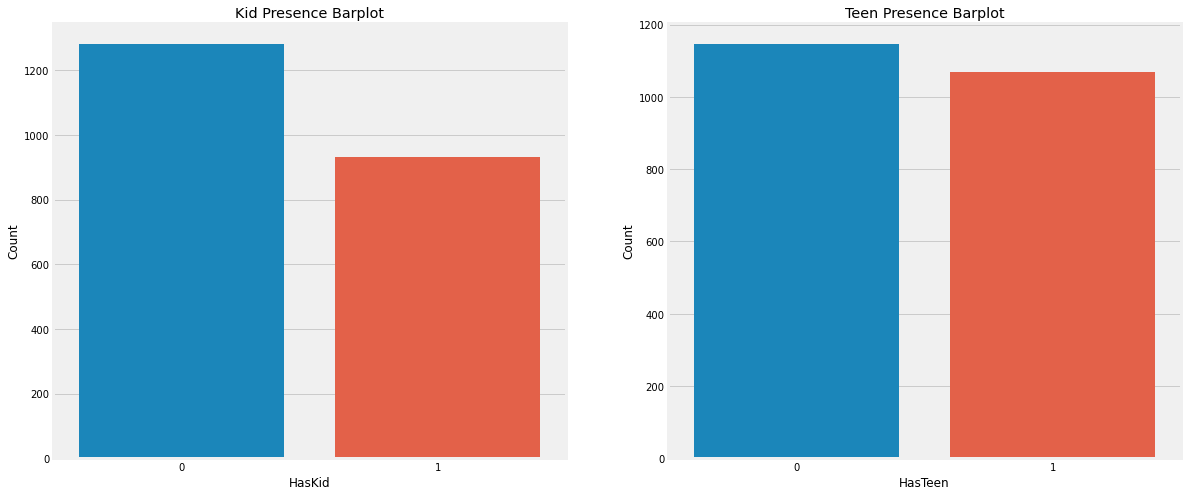

In [22]:
data['HasKid'] = np.where(data['Kidhome'] > 0, 1, 0)
data['HasTeen'] = np.where(data['Teenhome'] > 0, 1, 0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
ax = ax.ravel()

sns.countplot(data['HasKid'], ax=ax[0])
ax[0].set_ylabel('Count')
ax[0].set_title('Kid Presence Barplot')

sns.countplot(data['HasTeen'], ax=ax[1])
ax[1].set_ylabel('Count')
ax[1].set_title('Teen Presence Barplot')

plt.show()

In [23]:
data.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

In [24]:
# Inspecting date when customers enrolled with the company
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Dt_Customer'].dtype

dtype('<M8[ns]')

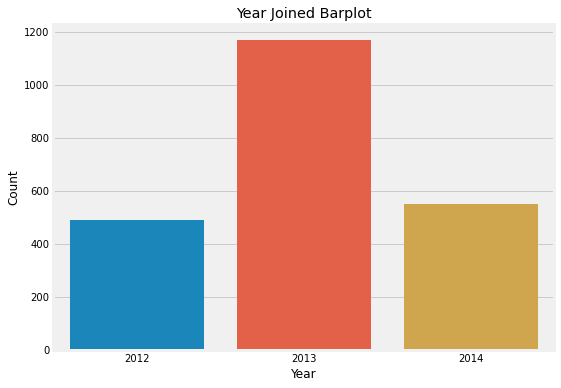

In [25]:
fig = plt.subplots(figsize=(8, 6))
sns.countplot(data['Dt_Customer'].dt.year)
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Year Joined Barplot')
plt.show()

2013 is the year where most of the customers enrolled with the company. After having a spike increase compared to last year (2012), the number of customers enrolled with the company in 2014 decreased drastically

We will transform **Dt_Customer** values to represent 'days since enrolled' by substracting the date enrolled from the data's last updated date (2020-12-19)

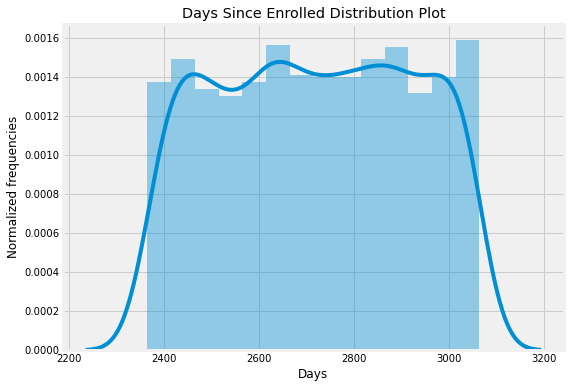

In [26]:
data['Dt_Customer'] = (pd.to_datetime('2020-12-19') - data['Dt_Customer']).dt.days
data.rename(columns={'Dt_Customer': 'Days_Since_Enrolled'}, inplace=True)

fig = plt.subplots(figsize=(8, 6))
sns.distplot(data['Days_Since_Enrolled'])
plt.ylabel('Normalized frequencies')
plt.xlabel('Days')
plt.title('Days Since Enrolled Distribution Plot')
plt.show()

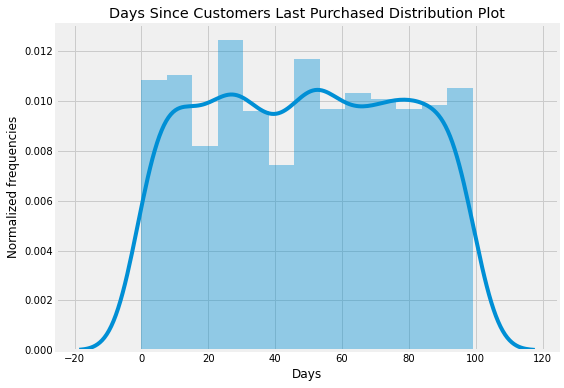

In [28]:
# Inspecting recency
fig = plt.subplots(figsize=(8, 6))
sns.distplot(data['Recency'])
plt.ylabel('Normalized frequencies')
plt.xlabel('Days')
plt.title('Days Since Customers Last Purchased Distribution Plot')
plt.show()

In [50]:
# Inspecting country
data['Country'].value_counts()

SP    1092
SA     336
CA     266
IN     147
AU     147
DE     116
US     107
ME       3
Name: Country, dtype: int64

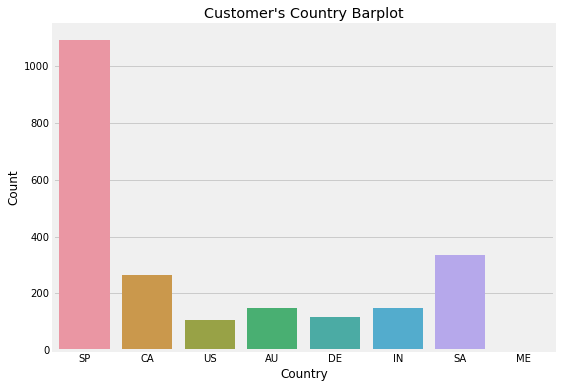

In [51]:
fig = plt.subplots(figsize=(8, 6))
sns.countplot(data['Country'])
plt.ylabel('Count')
plt.xlabel('Country')
plt.title("Customer's Country Barplot")
plt.show()

There are only 3 data points for customers from Mexico which may skew results related to this variable. And also We will transform the three-letter country codes into two-letter codes (ISO alpha-2)

In [ ]:
data['Country'].replace({'AUS': 'AU', 'GER': 'DE', 'IND': 'IN'}, inplace=True)

### Inspecting products purchased and channel performance

In [30]:
# Inspecting amount spent on categories and number of touchpoints
purchases_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                  'MntFishProducts', 'MntSweetProducts','MntGoldProds', 
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                  'NumStorePurchases', 'NumWebVisitsMonth']
data[purchases_cols].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000
mean,305.022584,26.314815,166.890696,37.621500,27.024390,43.902891,2.324752,4.086721,2.670732,5.803523,5.321590
std,337.285646,39.729301,224.200966,54.754774,41.079066,51.689627,1.924173,2.741404,2.926650,3.251023,2.424553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000


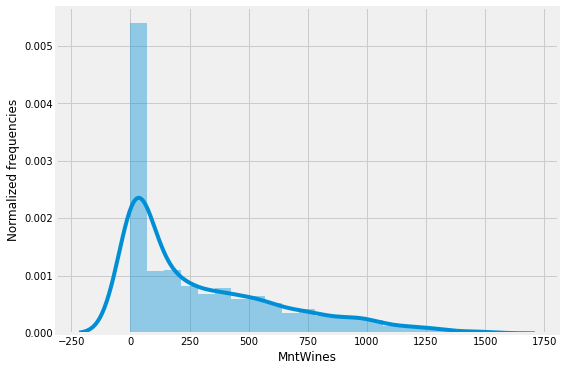

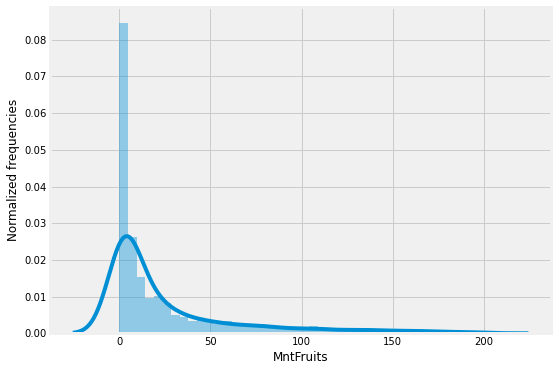

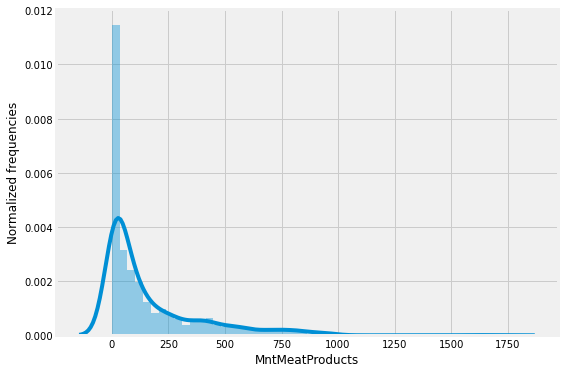

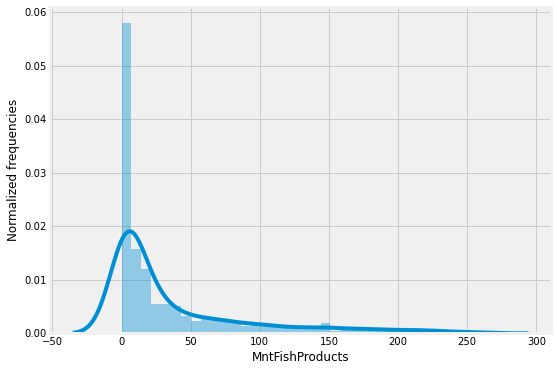

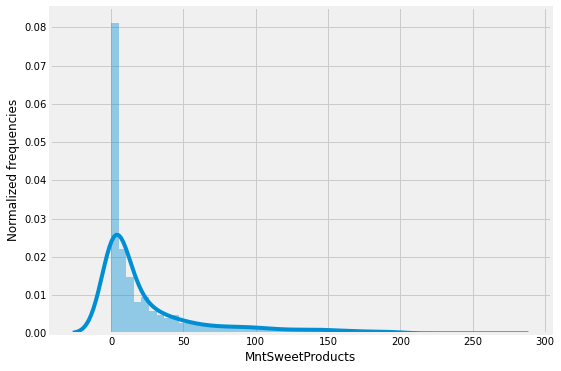

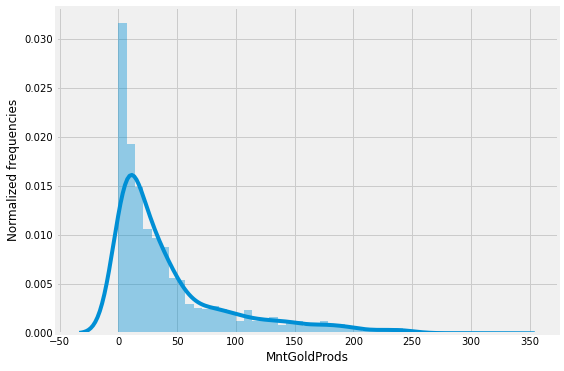

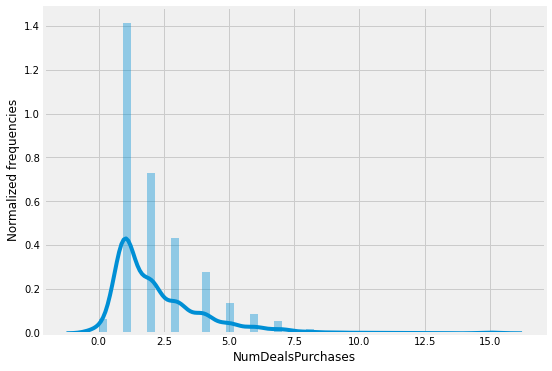

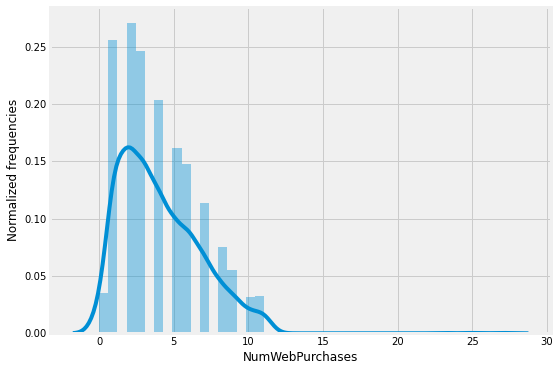

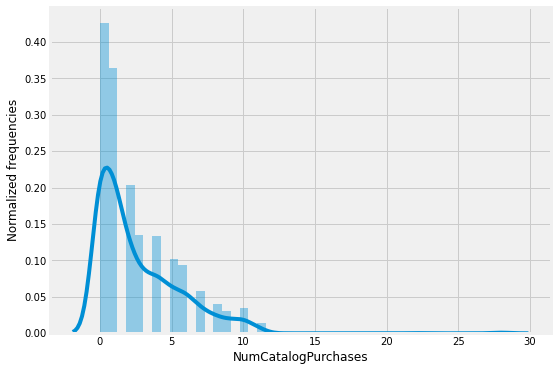

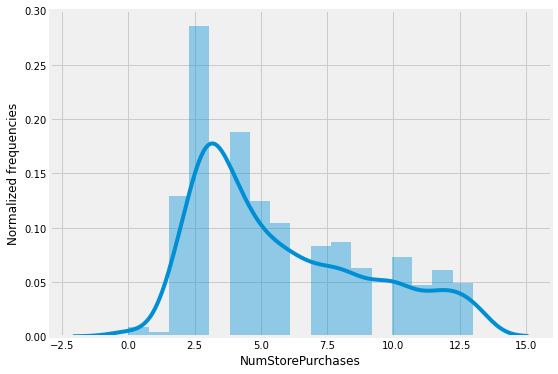

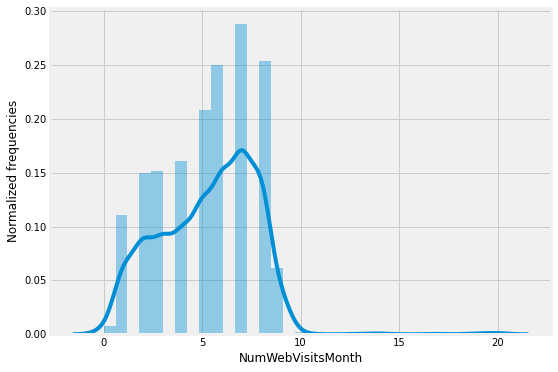

In [31]:
for i in range(len(purchases_cols)):
    fig = plt.subplots(figsize=(8, 6))
    sns.distplot(data[purchases_cols[i]])
    plt.ylabel('Normalized frequencies')
    plt.show()

The outliers in 'amount spent on categories' and 'number of touchpoint visits' are all acceptable and valid values. So, we should just keep it

### Inspecting marketing campaign performance

In [36]:
# Inspecting marketing campaign
campaign = data.loc[:, ['Response', 'AcceptedCmp1', 'AcceptedCmp2',
                       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]
campaign = campaign.melt()
campaign = pd.crosstab(campaign['variable'], campaign['value']).sort_values(0)

cols = list(campaign.columns)
a, b = cols.index(0), cols.index(1)
cols[b], cols[a] = cols[a], cols[b]
campaign = campaign[cols]
campaign.columns = 'Yes', 'No'

campaign

,Yes,No
variable,,
Response,333,1881
AcceptedCmp4,164,2050
AcceptedCmp3,163,2051
AcceptedCmp5,161,2053
AcceptedCmp1,142,2072
AcceptedCmp2,30,2184


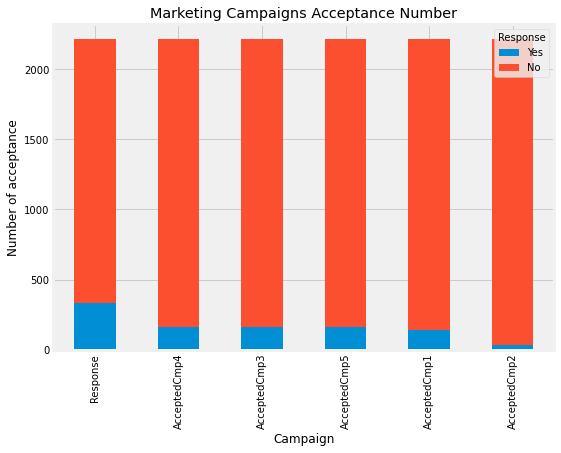

In [38]:
campaign.plot.bar(stacked=True, figsize=(8, 6))
plt.title('Marketing Campaigns Acceptance Number')
plt.xlabel('Campaign')
plt.ylabel('Number of acceptance')
plt.legend(title='Response', loc='upper right')
plt.show()

It can be observed that campaigns 4, 3, 5, and 1 performed similarly, whereas campaign 2 performed poorly. The latest campaign (under variable 'Response') had the best performance

In [39]:
# Inspecting complain data
data['Complain'].value_counts()

0    2193
1      21
Name: Complain, dtype: int64

Very few customers have filed any complains

In [48]:
data.sample(5)

,Education,Marital_Status,Income,Days_Since_Enrolled,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,HasKid,HasTeen,Age
553,Bachelor,Together,71367.0,2675,24,227,23,389,42,21,...,0,0,0,0,0,0,SP,0,0,61
248,PhD,Divorced,70179.0,2708,10,532,88,168,69,44,...,0,0,0,0,0,0,SA,0,1,44
2231,Bachelor,Widow,42429.0,2503,99,55,0,6,2,0,...,0,0,0,0,0,0,AU,0,1,47
1726,Bachelor,Divorced,64892.0,2396,77,527,24,230,32,24,...,0,0,0,0,0,0,SA,0,1,44
1236,Master,Married,72635.0,2756,54,390,22,323,104,35,...,0,0,1,0,0,0,SP,0,0,65


In [49]:
data.to_csv('../data/interim/marketing_data_eda_output.csv', index=False)